In [8]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


In [14]:
data = pd.read_csv("Advertising.csv")
data = data.drop(columns=["Unnamed: 0"])

In [80]:
X = data.drop(columns="sales")
y = data["sales"]
X["TV*radio"] = X["TV"] * X["radio"]
X["TV*newspaper"] = X["TV"] * X["newspaper"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [82]:
model = XGBRegressor(n_jobs=-1, n_estimators=10, max_leaves=10, max_depth=10, random_state=42)

In [83]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=10, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=-1, num_parallel_tree=None, ...)

In [84]:
from sklearn.metrics import r2_score

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.9943126042411476

In [85]:
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.9822997743696056

In [86]:
from sklearn.model_selection import cross_val_score
import optuna

# Definir función a optimizar
def objective(trial):
    # Sugerir parámetros
    n_estimators = trial.suggest_int("n_estimators", 1, 1000)  
    max_depth = trial.suggest_int("max_depth", 1, 1000)  
    max_leaves = trial.suggest_int("max_leaves", 1, 1000)  

    # Definir el modelo
    model = XGBRegressor(n_jobs=-1, n_estimators=n_estimators, max_leaves=max_leaves, max_depth=max_depth, random_state=42)

    # Realizar cv y obtener el score promedio
    score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2", n_jobs=-1).mean()
    
    return score  

#OPTUNA
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=100)  # Try 50 different sets of hyperparameters


print("Best hyperparameters:", study.best_params)

[I 2025-04-24 17:20:46,597] A new study created in memory with name: no-name-d4caee11-9abe-4dfa-aa0d-b6a556096405
[I 2025-04-24 17:20:46,986] Trial 0 finished with value: 0.9817036222488624 and parameters: {'n_estimators': 761, 'max_depth': 698, 'max_leaves': 849}. Best is trial 0 with value: 0.9817036222488624.
[I 2025-04-24 17:20:47,229] Trial 1 finished with value: 0.9817036222488624 and parameters: {'n_estimators': 465, 'max_depth': 539, 'max_leaves': 347}. Best is trial 0 with value: 0.9817036222488624.
[I 2025-04-24 17:20:47,534] Trial 2 finished with value: 0.9817036222488624 and parameters: {'n_estimators': 706, 'max_depth': 165, 'max_leaves': 890}. Best is trial 0 with value: 0.9817036222488624.
[I 2025-04-24 17:20:47,747] Trial 3 finished with value: 0.981703636209477 and parameters: {'n_estimators': 308, 'max_depth': 614, 'max_leaves': 219}. Best is trial 3 with value: 0.981703636209477.
[I 2025-04-24 17:20:48,008] Trial 4 finished with value: 0.9817036222488624 and paramete

Best hyperparameters: {'n_estimators': 69, 'max_depth': 3, 'max_leaves': 994}


In [87]:
model = XGBRegressor(n_jobs=-1, n_estimators=114, max_leaves=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.9999956236002709

In [88]:
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.9800714467971356

In [119]:
y_pred = model.predict(X)
errores = y - y_pred

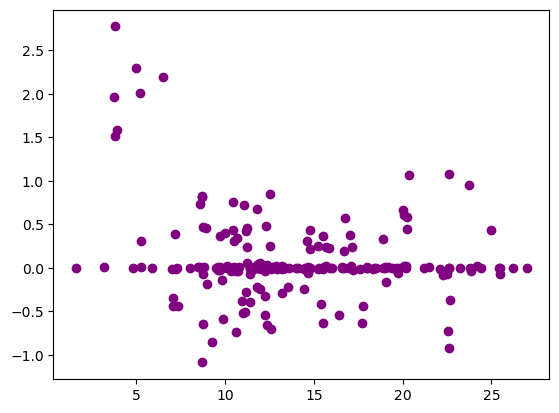

In [120]:
import matplotlib.pyplot as plt 

plt.scatter(y_pred, errores, c="purple")

In [121]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept = True)

errores = np.reshape(errores, [-1,1])
y_pred = np.reshape(y_pred, [-1,1])


linreg.fit(y_pred, errores)

linreg_pred = linreg.predict(y_pred)

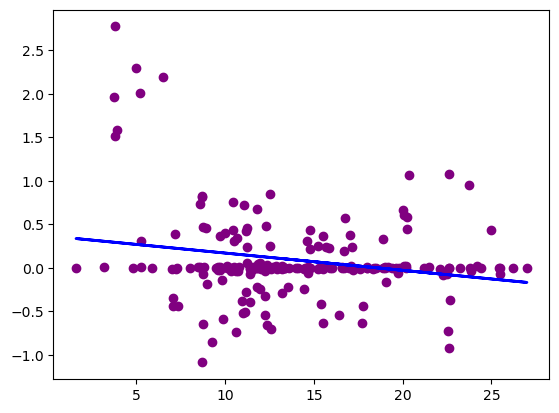

In [122]:
plt.scatter(y_pred, errores, c="purple")
plt.plot(y_pred, linreg_pred, color='blue', linewidth=2, label='Línea de regresión') 

In [124]:
import statsmodels.api as sm

ones = np.ones([len(errores), 1])
errores_array = np.hstack((ones, errores))

regresion_s = sm.OLS(errores, y_pred).fit()

regresion_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              1.815
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                       0.179
Time:                        17:47:55   Log-Likelihood:                         -148.42
No. Observations:                 200   AIC:                                      298.8
Df Residuals:                     199   BIC:                                      302.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0033      0.002      1.347      0.179      -0.002       0.008
==============================================================================
Omnibus:                      117.614   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.447
Skew:                           2.239   Prob(JB):                    4.94e-163
Kurtosis:                      11.346   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""